In [1]:
import torch
%run -i "./utils/data_model_loader.py"
%run -i "./utils/train_load_model.py"
%run -i "./utils/noise.py"
%run -i "./utils/conf_loader.py"

In [2]:
conf = load_config("conf.txt")
cuda = torch.cuda.is_available()
conf["cuda"] = cuda

## 1.1 Train Model on Data (MNIST, FashionMNIST)

In [3]:
train_mnist_dataset, test_mnist_dataset, train_mnist_loader, test_mnist_loader,\
train_fashion_dataset, test_fashion_dataset,train_fashion_loader, test_fashion_loader, \
mnist_model1, mnist_model2, fashion_model1, fashion_model2 = get_all_loaders_and_models(conf)

Nice! We have trained the models and found from: cachedModels/


## 2.1 Exploration on Model's Bais on Randomly Generated White Noise

In [4]:
noise, noisy_image_summary = generate_white_noise(mnist_model1, conf)

100%|█████████████████████████████████████████| 100/100 [09:13<00:00,  5.53s/it]


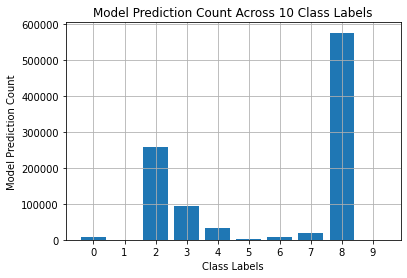

{0: tensor(8284), 1: tensor(14), 2: tensor(257513), 3: tensor(93915), 4: tensor(34143), 5: tensor(3067), 6: tensor(6883), 7: tensor(18770), 8: tensor(577052), 9: tensor(359)}


In [5]:
visualize_noise_summary(noisy_image_summary, conf["CLASS_NUM"])
print(noisy_image_summary)

From the above, we can see that even though the noise is randomly generated, the model predicts most noises as 2 and 8. We could argue that 2 and 8 has lots more structure in the digit form compared to other digits.

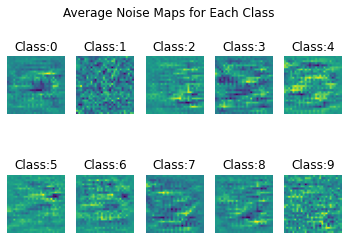

In [6]:
visualize_noise(noise, noisy_image_summary, conf["CLASS_NUM"])

## 3. Embedded Noise Analysis

100%|█████████████████████████████████████████| 100/100 [07:06<00:00,  4.26s/it]


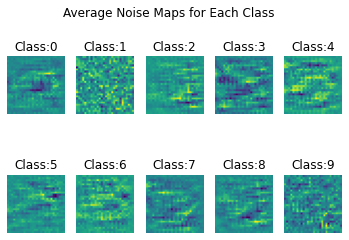

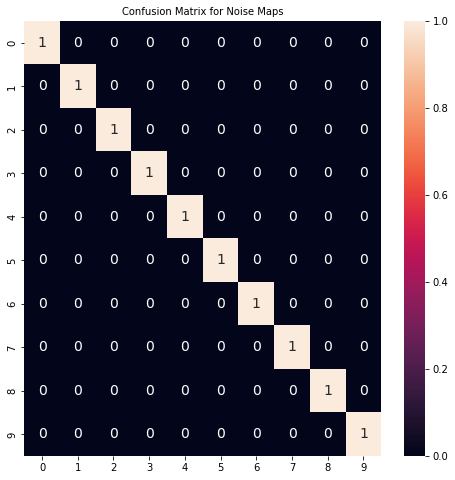

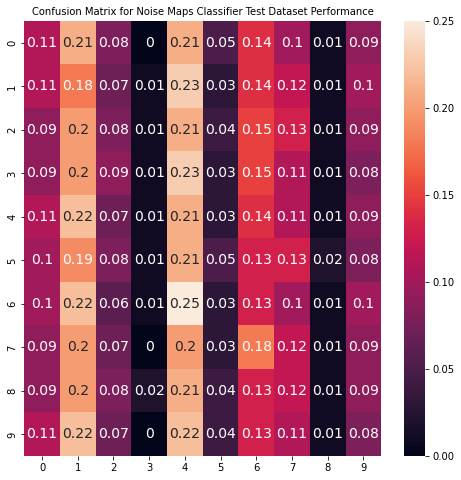

In [7]:
embed_noise_visualize_classify_report(mnist_model1,test_mnist_loader, conf)

100%|█████████████████████████████████████████| 100/100 [03:44<00:00,  2.24s/it]


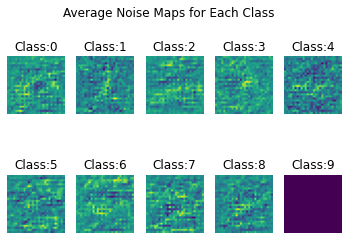

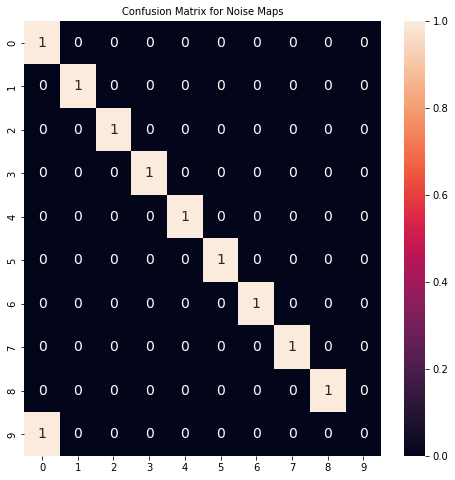

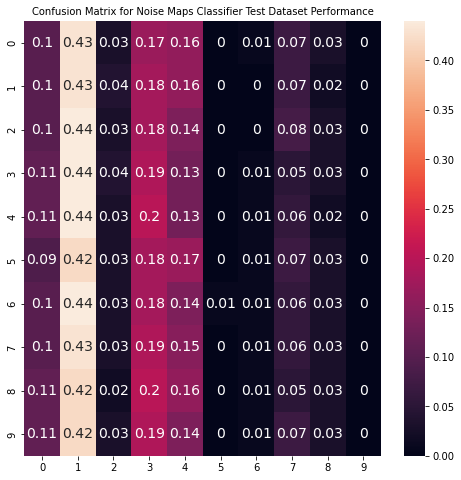

In [8]:
embed_noise_visualize_classify_report(mnist_model2,test_mnist_loader, conf)

100%|█████████████████████████████████████████| 100/100 [06:23<00:00,  3.83s/it]


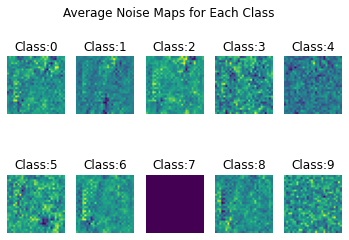

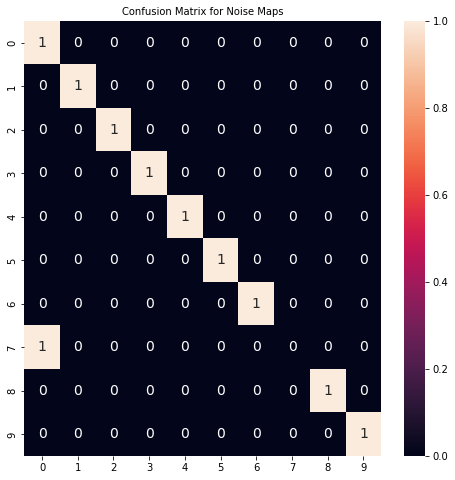

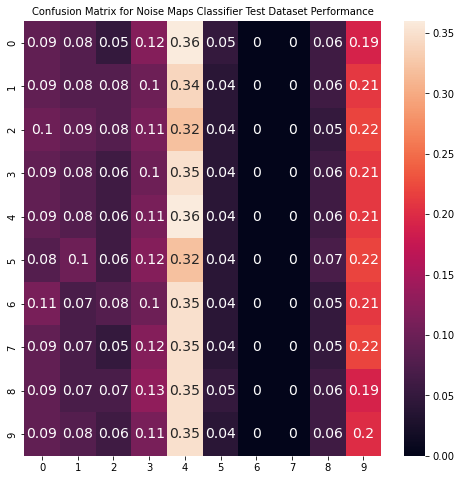

In [9]:
embed_noise_visualize_classify_report(fashion_model1,test_fashion_loader, conf)

100%|█████████████████████████████████████████| 100/100 [03:30<00:00,  2.11s/it]


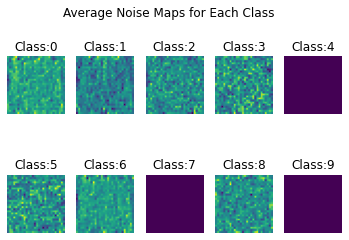

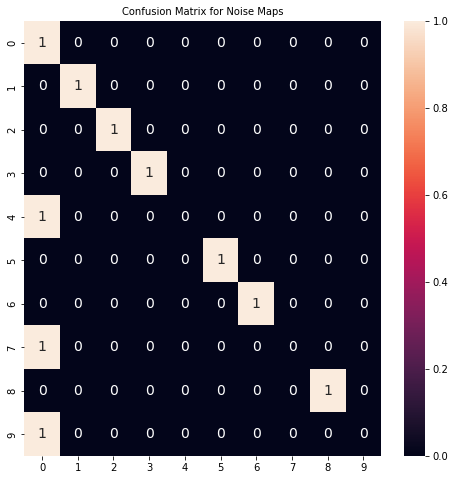

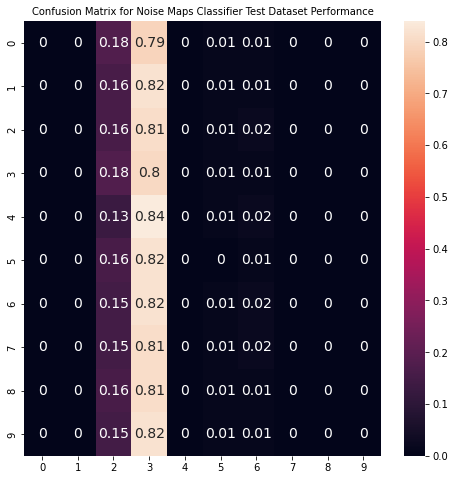

In [10]:
embed_noise_visualize_classify_report(fashion_model2,test_fashion_loader, conf)